## CANCER DATA SET

# Description:
The gbsg data set contains patient records from a 1984-1989 trial conducted by the German Breast Cancer Study Group (GBSG) of 720 patients with node positive breast cancer; it retains the 686 patients with complete data for the prognostic variables.

# Dataset Information:
1.pid:patient identifier

2.age:age,in years

3.meno:menopausal status (0= premenopausal, 1= postmenopausal)

4.size:tumor size,in mm

5.grade:tumor grade

6.nodes:number of positive lymph nodes

7.pgr:progesterone receptors (fmol/l)

8.er:estrogen receptors (fmol/l)

9.hormon:hormonal therapy, 0= no, 1= yes

10.rfstime:recurrence free survival time; days to first of reccurence, death or last follow-up

11.status:0= alive without recurrence, 1= recurrence or death

# Problem Statement:
The objective of the GBSG dataset is to predict tumor size. The datasets of several predictor (independent) variables and one target variable (tumor size)

# Importing Libraries 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [2]:
df = pd.read_csv('gbsg.csv')

# Exploratory Data Analysis

# understanding Variables
     1)Head of the dataset
     2)The shape of the dataset
     3)List types of all columns
     4)Info of the dataset
     5)Summary of the dataset

In [3]:
#head of the dataset
df.head()

,observations,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
0,1,132,49,0,18,2,2,0,0,0,1838,0
1,2,1575,55,1,20,3,16,0,0,0,403,1
2,3,1140,56,1,40,3,3,0,0,0,1603,0
3,4,769,45,0,25,3,1,0,4,0,177,0
4,5,130,65,1,30,2,5,0,36,1,1855,0


In [4]:
#tail of the dataset
df.tail()

,observations,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
681,682,586,51,0,30,3,2,1152,38,1,1760,0
682,683,1273,64,1,26,2,2,1356,1144,1,1152,0
683,684,1525,57,1,35,3,1,1490,209,1,1342,0
684,685,736,44,0,21,2,3,1600,70,0,629,0
685,686,894,80,1,7,2,7,2380,972,1,758,0


In [5]:
#the shape of the dataset
df.shape

(686, 12)

In [6]:
#List types of all columns
df.columns

Index(['observations', 'pid', 'age', 'meno', 'size', 'grade', 'nodes', 'pgr',
       'er', 'hormon', 'rfstime', 'status'],
      dtype='object')

In [7]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   observations  686 non-null    int64
 1   pid           686 non-null    int64
 2   age           686 non-null    int64
 3   meno          686 non-null    int64
 4   size          686 non-null    int64
 5   grade         686 non-null    int64
 6   nodes         686 non-null    int64
 7   pgr           686 non-null    int64
 8   er            686 non-null    int64
 9   hormon        686 non-null    int64
 10  rfstime       686 non-null    int64
 11  status        686 non-null    int64
dtypes: int64(12)
memory usage: 64.4 KB


In [8]:
# Statistical summary
df.describe()

,observations,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,343.500000,966.061224,53.052478,0.577259,29.329446,2.116618,5.010204,109.995627,96.252187,0.358601,1124.489796,0.435860
std,198.175427,495.506249,10.120739,0.494355,14.296217,0.582808,5.475483,202.331552,153.083963,0.479940,642.791948,0.496231
min,1.000000,1.000000,21.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,172.250000,580.750000,46.000000,0.000000,20.000000,2.000000,1.000000,7.000000,8.000000,0.000000,567.750000,0.000000
50%,343.500000,1015.500000,53.000000,1.000000,25.000000,2.000000,3.000000,32.500000,36.000000,0.000000,1084.000000,0.000000
75%,514.750000,1340.500000,61.000000,1.000000,35.000000,2.000000,7.000000,131.750000,114.000000,1.000000,1684.750000,1.000000
max,686.000000,1819.000000,80.000000,1.000000,120.000000,3.000000,51.000000,2380.000000,1144.000000,1.000000,2659.000000,1.000000


# Data Cleaning

# Check the Null Values

In [9]:
df.isnull().sum()

observations    0
pid             0
age             0
meno            0
size            0
grade           0
nodes           0
pgr             0
er              0
hormon          0
rfstime         0
status          0
dtype: int64

# Check the duplicates

In [10]:
df.duplicated().sum()

0

# Data Visualization
 Histograms

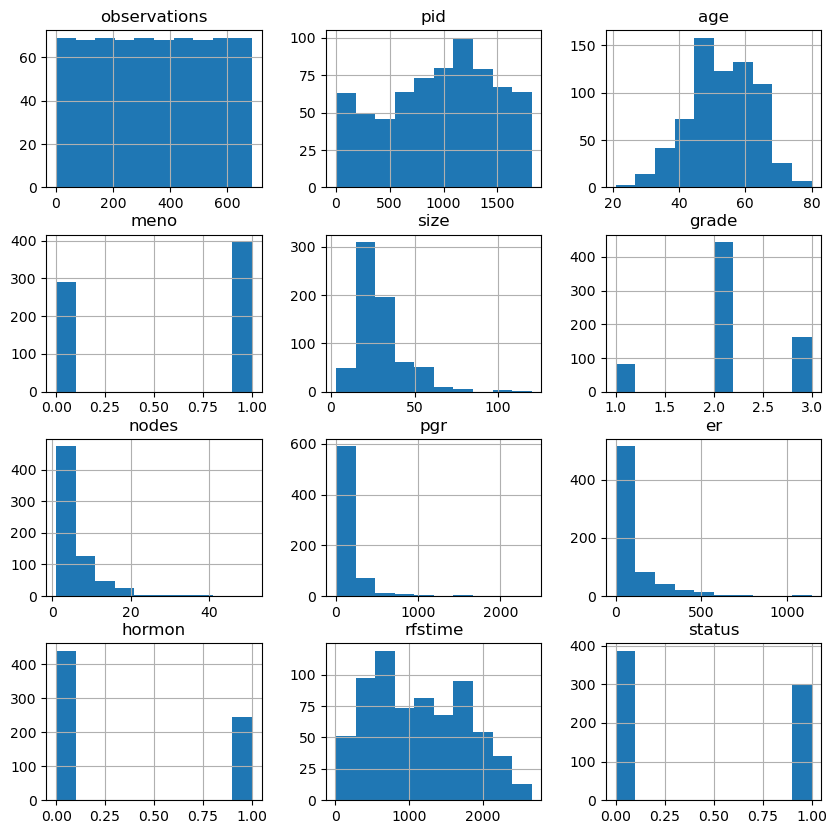

In [11]:
df.hist(bins=10,figsize=(10,10))
plt.show()

<Axes: xlabel='size', ylabel='Density'>

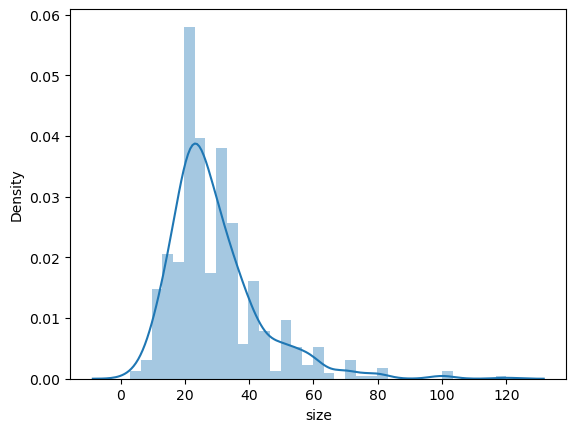

In [12]:
sns.distplot(df['size'])

## Will use Log Transformation for charges to convert right skewed into normal distribution

<Axes: xlabel='size', ylabel='Density'>

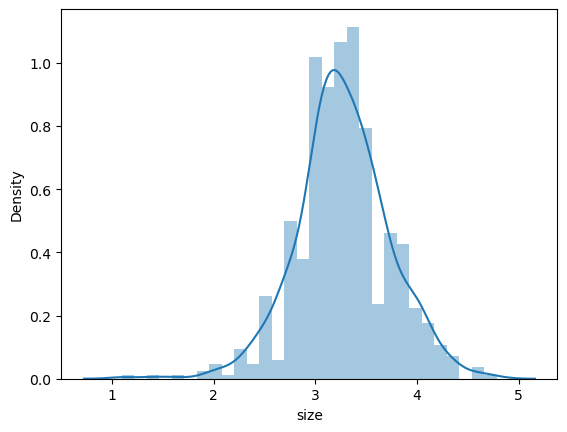

In [13]:
sns.distplot(np.log(df['size']))

In [14]:
new_df=df.copy()

In [15]:
new_df['size']=np.log(df['size'])

In [16]:
new_df.head()

,observations,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
0,1,132,49,0,2.890372,2,2,0,0,0,1838,0
1,2,1575,55,1,2.995732,3,16,0,0,0,403,1
2,3,1140,56,1,3.688879,3,3,0,0,0,1603,0
3,4,769,45,0,3.218876,3,1,0,4,0,177,0
4,5,130,65,1,3.401197,2,5,0,36,1,1855,0


# Scatter plot

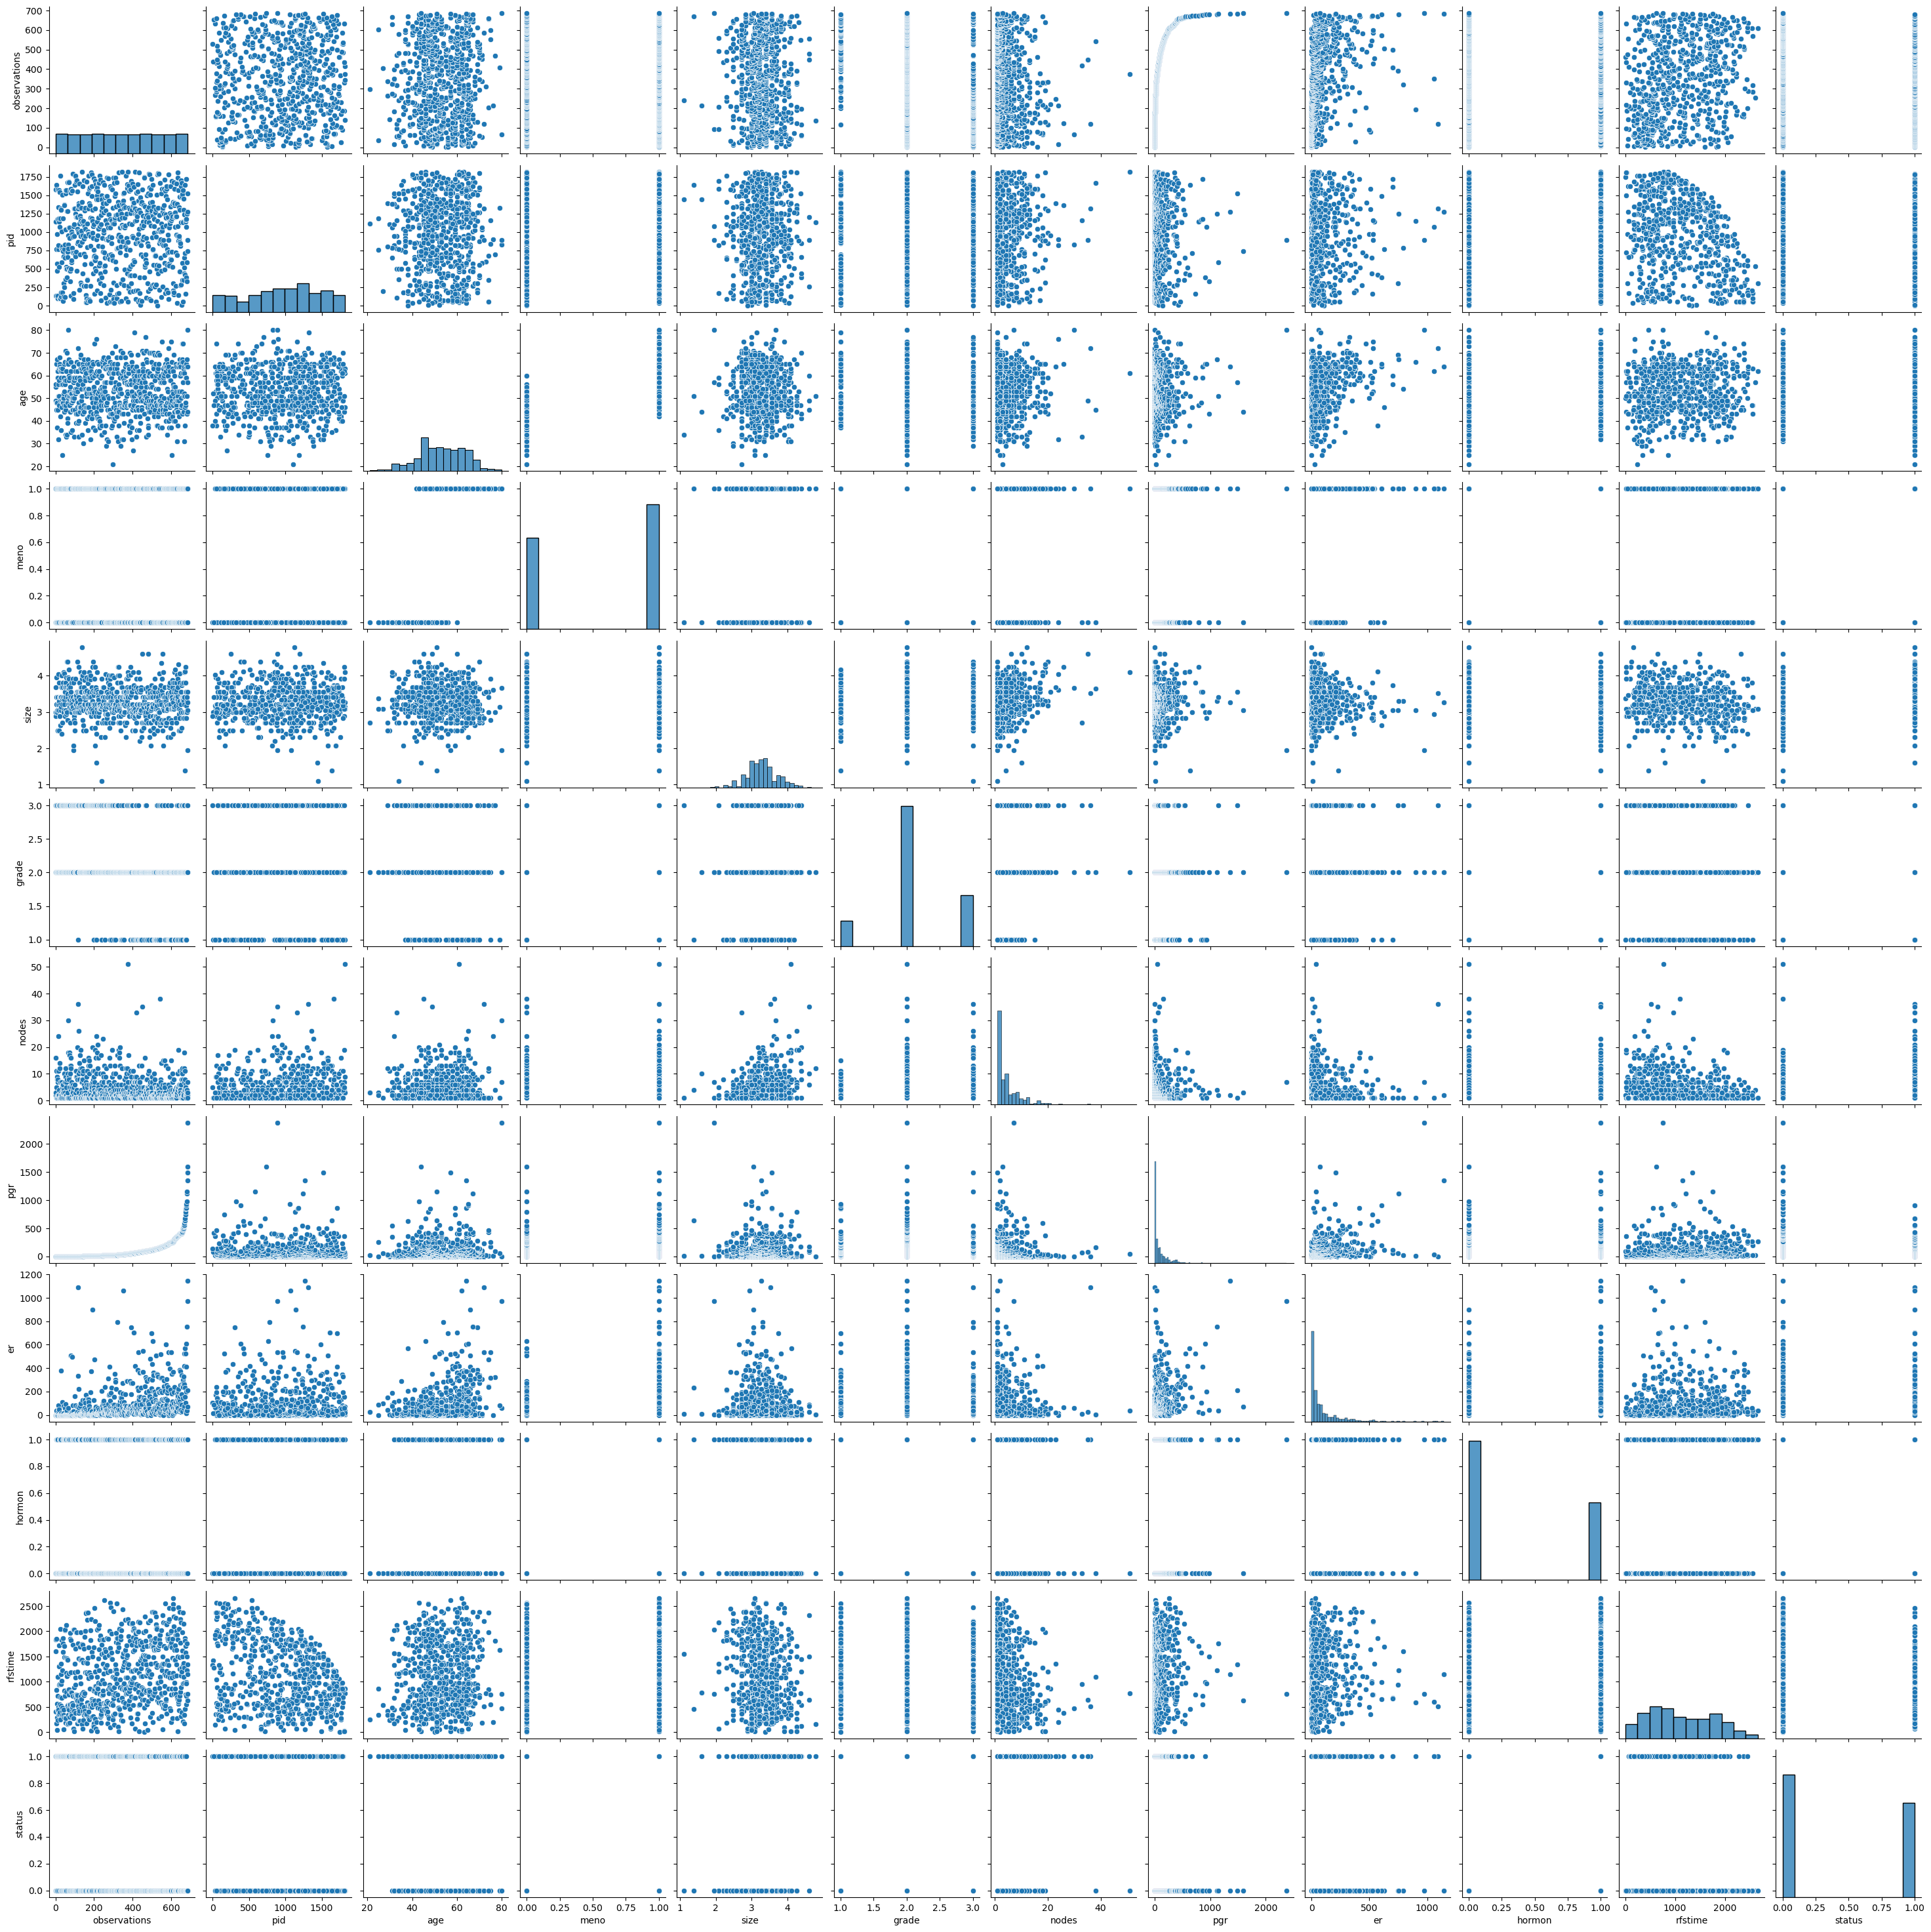

In [17]:
sns.pairplot(new_df)

# Effect of age on size of tumor

# Progesterone Receptors (fmol/l) at different Ages

Progesterone receptors (PRs) are a type of nuclear receptor protein found in cells that bind to the hormone progesterone. Progesterone is a female sex hormone that plays a key role in the menstrual cycle, pregnancy, and embryonic development. PRs are expressed in a variety of tissues, including the uterus, breast, ovaries, and brain.

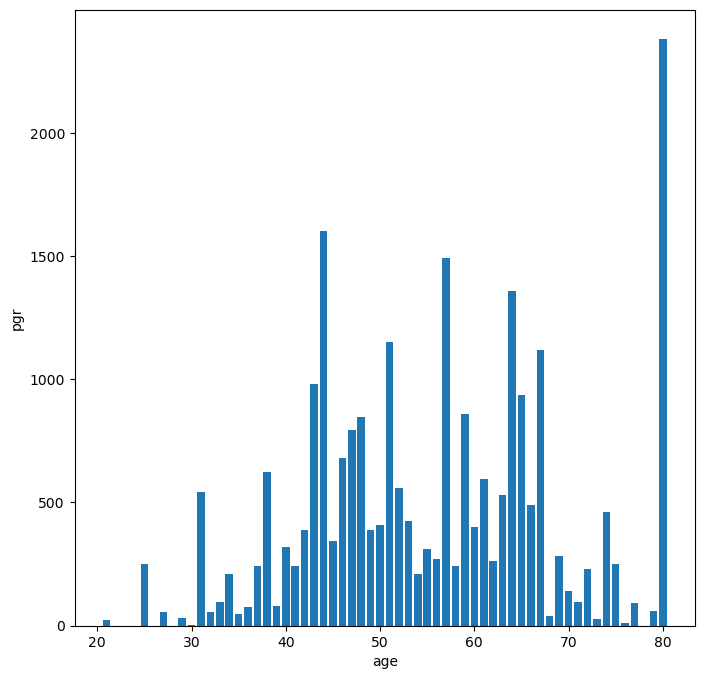

In [18]:
plt.figure(figsize=(8,8))
plt.bar('age','pgr', data=df)
plt.xlabel('age')
plt.ylabel('pgr')
plt.show()

# Estrogen Receptors (fmol/l) at different Ages

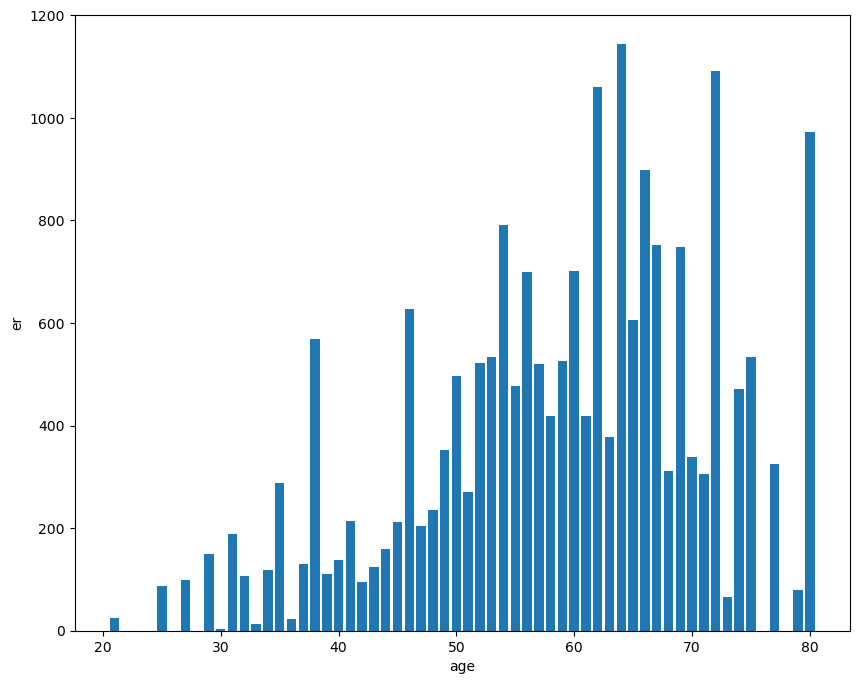

In [19]:
plt.figure(figsize=(10,8))
plt.bar('age','er', data=df)
plt.xlabel('age')
plt.ylabel('er')
plt.show()

# Effect of age on the tumor size.

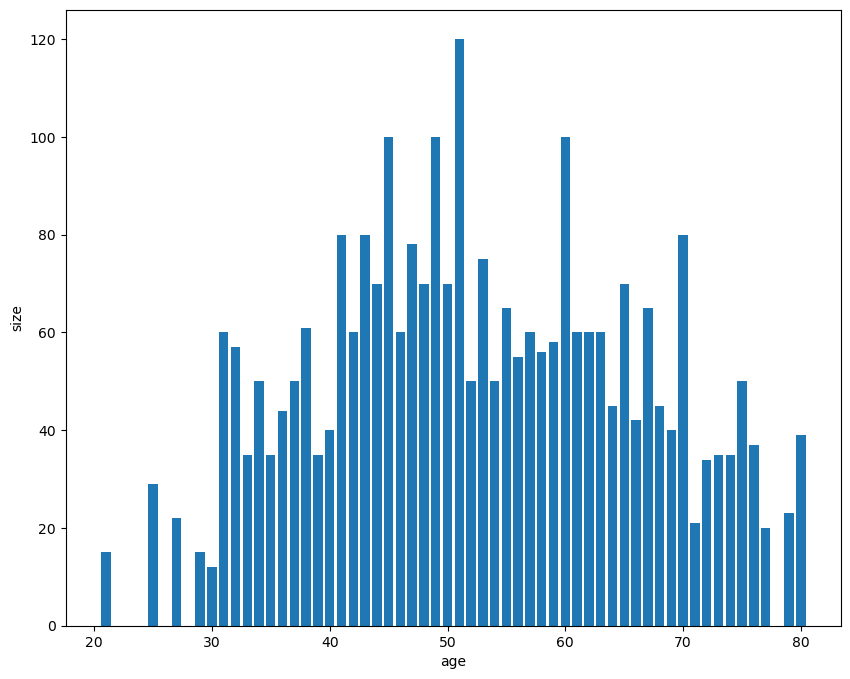

In [20]:
plt.figure(figsize=(10,8))
plt.bar('age','size', data=df)
plt.xlabel('age')
plt.ylabel('size')
plt.show()

# Effect of Menopausal Status on Size of Tumor
(0= premenopausal, 1= postmenopausal)

Menopausal status refers to a woman's current stage of menopause, which can be determined by a number of factors, including menstrual history, hormone levels, and symptoms

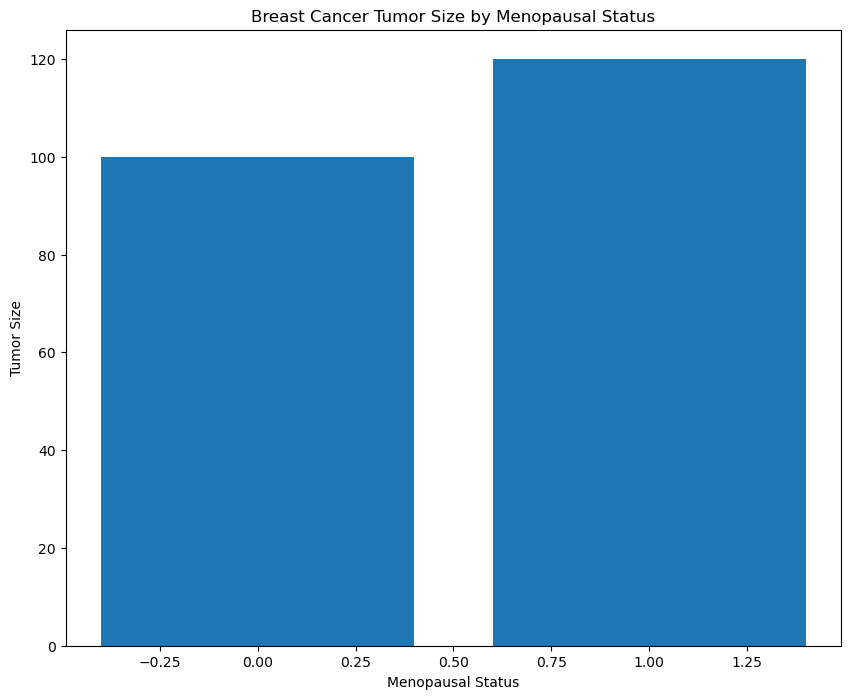

In [21]:
plt.figure(figsize=(10,8))
plt.bar('meno','size', data=df)
plt.title('Breast Cancer Tumor Size by Menopausal Status')
plt.xlabel('Menopausal Status')
plt.ylabel('Tumor Size')
plt.show()

# Distribution of Tumor Grade

Tumor grade refers to the degree of abnormality or differentiation of cancer cells compared to normal cells, and is a key factor in determining the aggressiveness of a tumor.

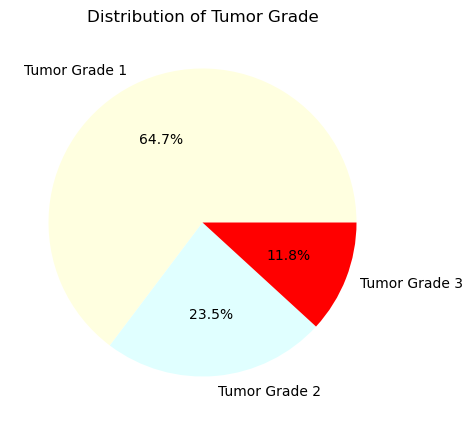

In [22]:
plt.figure(figsize=(5,5))
df_grade=df['grade'].value_counts()
labels = ['Tumor Grade 1', 'Tumor Grade 2','Tumor Grade 3']
plt.pie(df_grade, labels=labels, autopct='%1.1f%%',colors=['lightyellow', 'lightcyan','red'])
plt.title('Distribution of Tumor Grade')
plt.show()

# Distribution of Patient Status

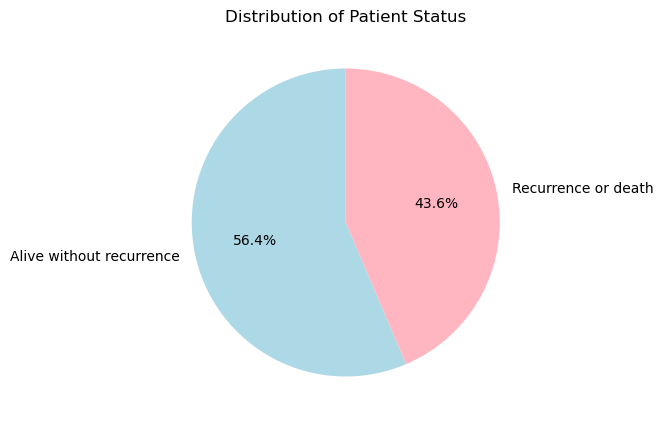

In [23]:
plt.figure(figsize=(5,5))
df_pie= df['status'].value_counts()
labels = ['Alive without recurrence', 'Recurrence or death']
plt.pie(df_pie, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink'])
plt.title('Distribution of Patient Status')
plt.show()

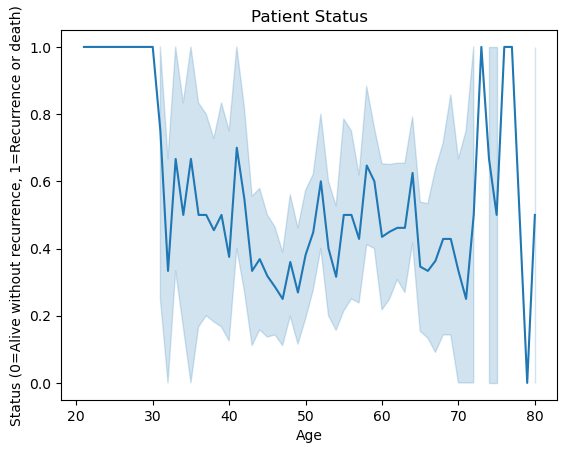

In [24]:
sns.lineplot(x='age', y='status', data=df)
plt.title('Patient Status')
plt.xlabel('Age')
plt.ylabel('Status (0=Alive without recurrence, 1=Recurrence or death)')
plt.show()

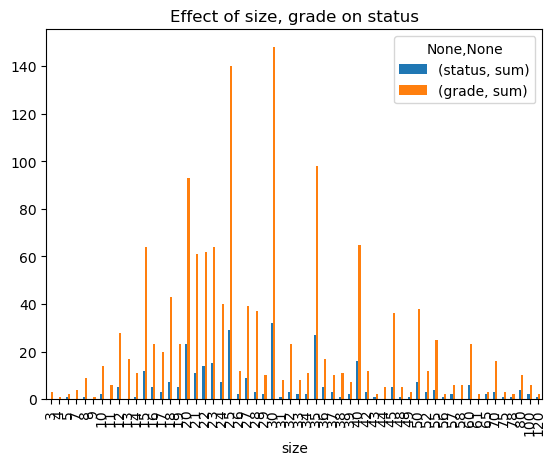

In [25]:
df.groupby('size')['status','grade'].agg(['sum']).plot.bar()
plt.title('Effect of size, grade on status')
plt.rcParams['figure.figsize']= [15,15]
plt.show()

Effect of Age on Grade and Size

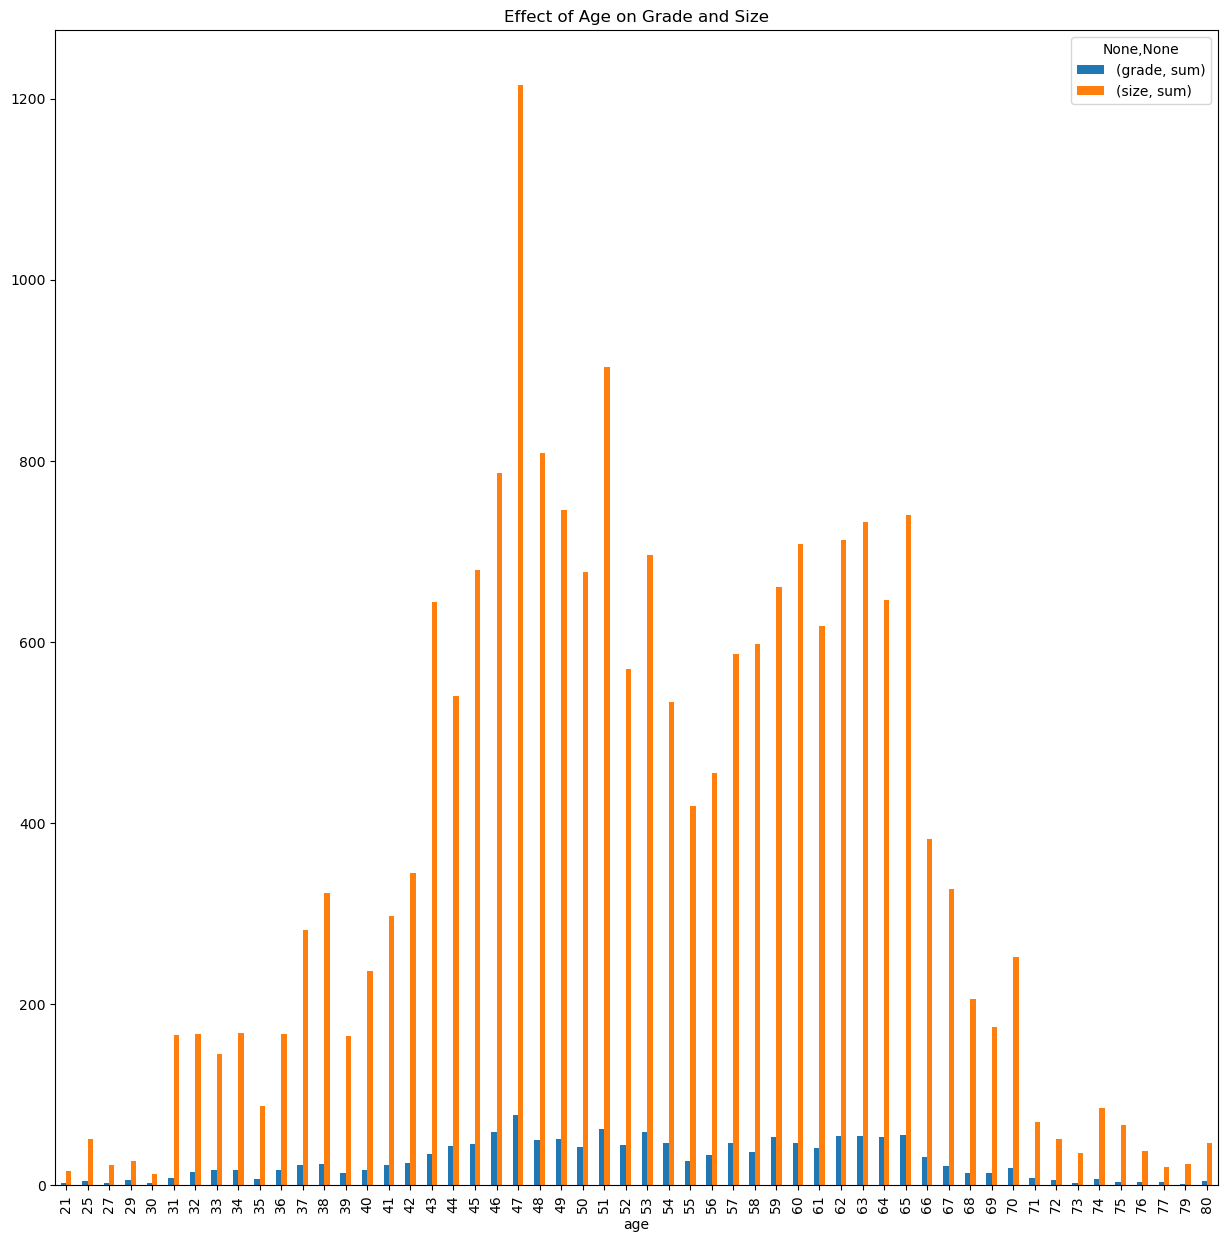

In [26]:
df.groupby('age')['grade','size'].agg(['sum']).plot.bar()
plt.title('Effect of Age on Grade and Size')
plt.rcParams['figure.figsize']= [15,15]
plt.show()

# Frequency as per age

47    36
51    29
46    28
62    26
63    26
49    26
65    26
48    25
59    25
53    25
64    24
60    23
45    22
57    21
50    21
52    20
61    20
44    19
54    19
43    18
58    17
56    16
66    15
55    14
67    11
38    11
42    11
41    10
37    10
70     9
40     8
68     7
69     7
33     6
39     6
34     6
36     6
32     6
31     4
71     4
35     3
74     3
72     2
80     2
29     2
25     2
75     2
30     1
76     1
21     1
73     1
27     1
79     1
77     1
Name: age, dtype: int64


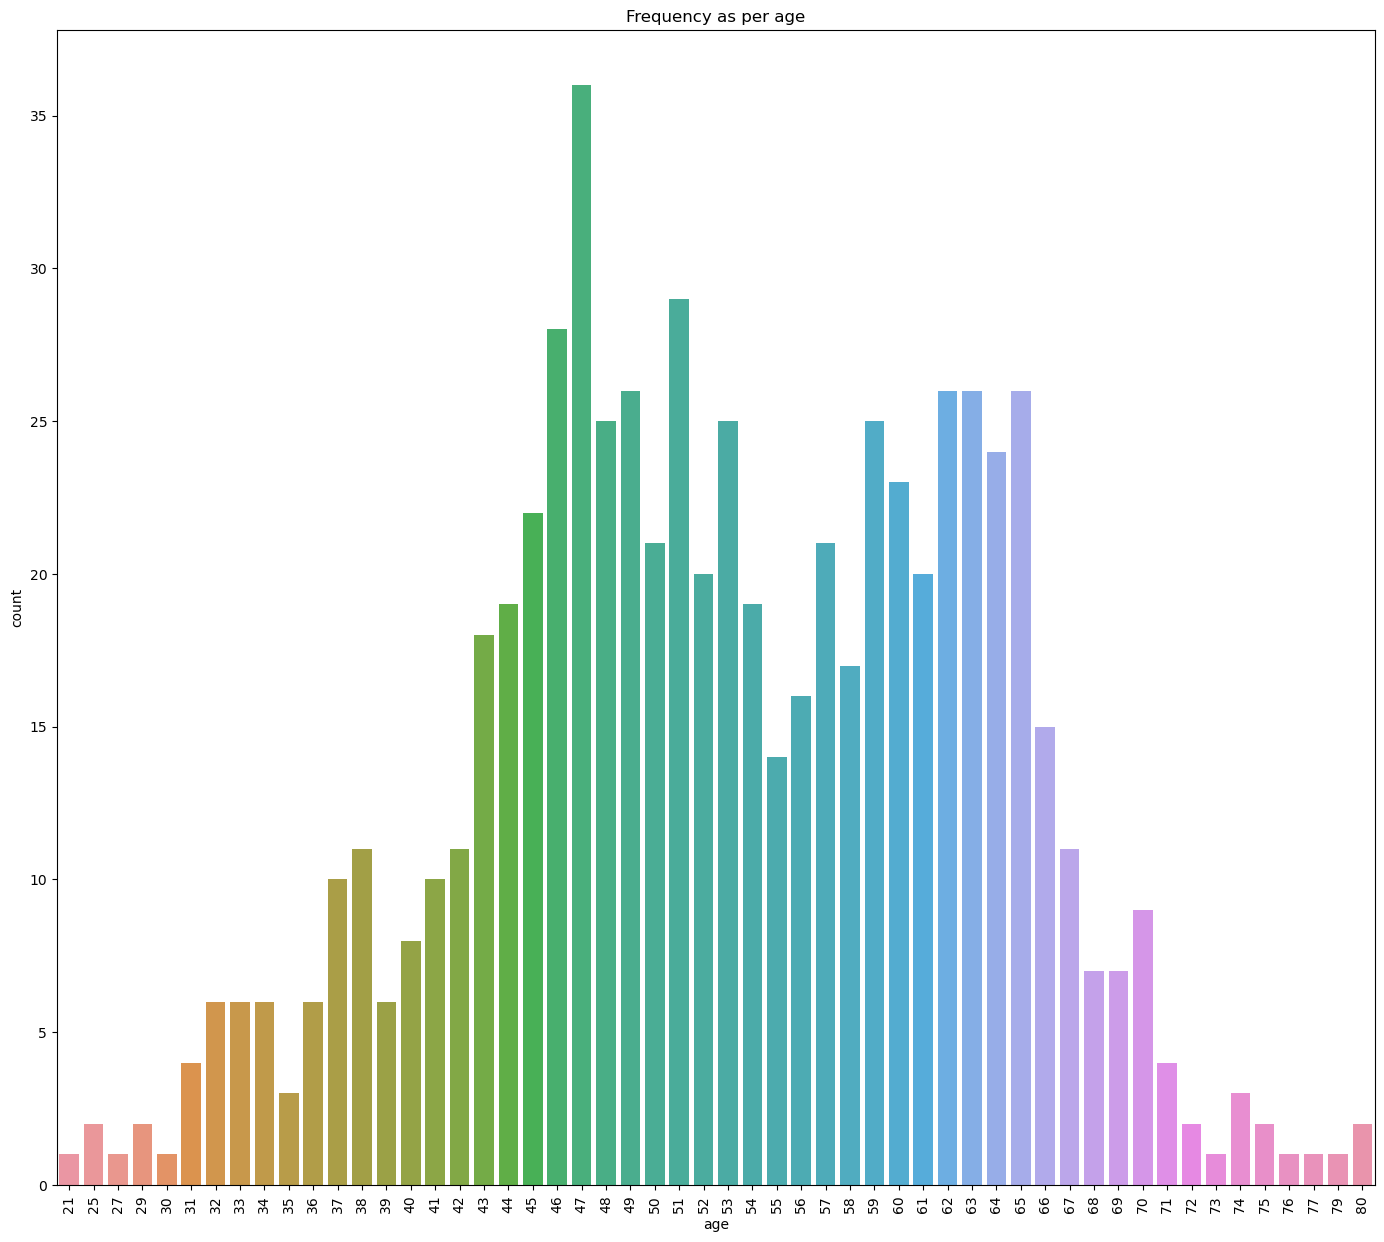

In [27]:
print(df['age'].value_counts())
plt.figure(figsize=(17,15))
sns.countplot(x=df['age'])
plt.title('Frequency as per age')
plt.xticks(rotation=90)
plt.show()

# Patient Status

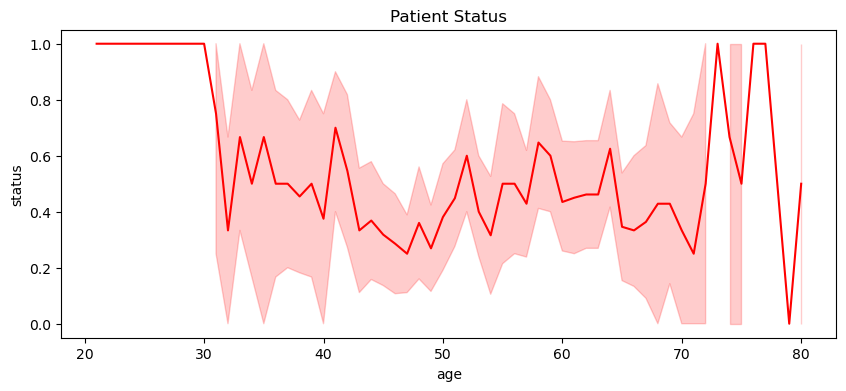

In [28]:
plt.figure(figsize=(10,4))
sns.lineplot(x='age', y='status', data=df, color='red')
plt.title('Patient Status')
plt.show()

# Nodes status as per Age

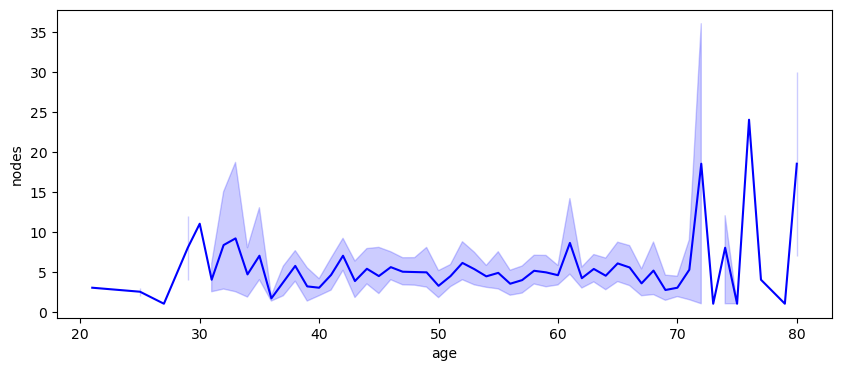

In [29]:
plt.figure(figsize=(10,4))
sns.lineplot(x='age', y='nodes', data=df, color='blue')
plt.show()

# To solve a regression problem, which involves predicting a continuous numerical value, you can follow these general steps:

1.Understand the problem.

2.Collect and preprocess the data.

3.Feature engineering.

4.Split the data.

5.Select a regression algorithm.

6.Train the regression model.

7.Evaluate the model.

8.Fine-tune the mode.

9.Make predictions.

10.Monitor and update.



understanding the problem ,collection and preprocessing the data is already observed

# 3.Feature engineering.

pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.

In [30]:
df2 = pd.get_dummies(new_df,drop_first=True)

In [31]:
df2.shape

(686, 12)

In [32]:
df2.head()

,observations,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
0,1,132,49,0,2.890372,2,2,0,0,0,1838,0
1,2,1575,55,1,2.995732,3,16,0,0,0,403,1
2,3,1140,56,1,3.688879,3,3,0,0,0,1603,0
3,4,769,45,0,3.218876,3,1,0,4,0,177,0
4,5,130,65,1,3.401197,2,5,0,36,1,1855,0


# 4.Split the data.

In [33]:
# Separate object for target feature 
y = df2['size']

# Separate object for Predictors 
X = df2.drop('size',axis=1)

In [34]:
X.head()

,observations,pid,age,meno,grade,nodes,pgr,er,hormon,rfstime,status
0,1,132,49,0,2,2,0,0,0,1838,0
1,2,1575,55,1,3,16,0,0,0,403,1
2,3,1140,56,1,3,3,0,0,0,1603,0
3,4,769,45,0,3,1,0,4,0,177,0
4,5,130,65,1,2,5,0,36,1,1855,0


In [35]:
y.head()

0    2.890372
1    2.995732
2    3.688879
3    3.218876
4    3.401197
Name: size, dtype: float64

In [36]:
print('X Shape =',X.shape,'\ny Shape =',y.shape)

X Shape = (686, 11) 
y Shape = (686,)


# Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [38]:
X_train.shape,y_train.shape

((548, 11), (548,))

In [39]:
y_train.shape,y_test.shape

((548,), (138,))

# 5.Select a regression algorithm.

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [41]:
train_score = lr.score(X_train,y_train)
print('Train Score = ',train_score)

Train Score =  0.10018724799019663


In [42]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print('R2 Score =',score)

R2 Score = 0.07289900003627103


In [43]:
from sklearn import metrics
print('Mean Absolute Error =',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error =',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error = 0.3225439111618464
Mean Squared Error = 0.1806940025152889
Root Mean Squared Error = 0.4250811716781736


In [44]:
# To find the intercept 
print('Intercept =',np.exp(lr.intercept_))

Intercept = 19.524374454950408


In [45]:
# To find the co-efficients
print('coefficients =',np.exp(lr.coef_))

coefficients = [1.00019566 1.00001416 1.00052169 0.99894752 1.05500376 1.02268118
 0.99981372 0.99987876 1.00531297 0.99998372 1.03272515]


In [46]:
pd.DataFrame({'Actual':np.exp(y_test),'Predicted':np.exp(y_pred),'Variance':np.exp(y_test)-np.exp(y_pred)})

,Actual,Predicted,Variance
482,32.0,24.102562,7.897438
23,30.0,27.105588,2.894412
189,13.0,27.459536,-14.459536
47,18.0,25.973347,-7.973347
363,30.0,29.758417,0.241583
...,...,...,...
365,10.0,25.695050,-15.695050
362,35.0,23.918247,11.081753
378,24.0,24.859014,-0.859014
262,35.0,26.783351,8.216649


# Importing Libraries to Build OLS Model

In [47]:
# Needed libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf

# Train and Test Split

In [48]:
# Now, split data into train and test in approx 70:30 ratio
round(1337*.7,0)

936.0

In [49]:
ols_train = new_df.iloc[0:937, ]
ols_test = new_df.iloc[937:1338, ]

In [50]:
ols_train.columns

Index(['observations', 'pid', 'age', 'meno', 'size', 'grade', 'nodes', 'pgr',
       'er', 'hormon', 'rfstime', 'status'],
      dtype='object')

In [51]:
ols_train.shape

(686, 12)

In [52]:
model_1 = smf.ols(formula='size ~ age + meno + grade + nodes + hormon ',data = ols_train).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     13.66
Date:                Sun, 21 May 2023   Prob (F-statistic):           1.01e-12
Time:                        14:50:04   Log-Likelihood:                -405.63
No. Observations:                 686   AIC:                             823.3
Df Residuals:                     680   BIC:                             850.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0636      0.136     22.478      0.0

# Build the Regression Algorithm

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# Evaluation Metrics

In [54]:
train_score = lr.score(X_train,y_train)
print('Train Score = ',train_score)

Train Score =  0.10018724799019663


In [55]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print('R2 Score =',score)

R2 Score = 0.07289900003627103


In [56]:
from sklearn import metrics
print('Mean Absolute Error =',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error =',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error = 0.3225439111618464
Mean Squared Error = 0.1806940025152889
Root Mean Squared Error = 0.4250811716781736


In [57]:
# To find the intercept 
print('Intercept =',np.exp(lr.intercept_))

Intercept = 19.524374454950408


In [58]:
# To find the co-efficients
print('coefficients =',np.exp(lr.coef_))

coefficients = [1.00019566 1.00001416 1.00052169 0.99894752 1.05500376 1.02268118
 0.99981372 0.99987876 1.00531297 0.99998372 1.03272515]


In [59]:
pd.DataFrame({'Actual':np.exp(y_test),'Predicted':np.exp(y_pred),'Variance':np.exp(y_test)-np.exp(y_pred)})

,Actual,Predicted,Variance
482,32.0,24.102562,7.897438
23,30.0,27.105588,2.894412
189,13.0,27.459536,-14.459536
47,18.0,25.973347,-7.973347
363,30.0,29.758417,0.241583
...,...,...,...
365,10.0,25.695050,-15.695050
362,35.0,23.918247,11.081753
378,24.0,24.859014,-0.859014
262,35.0,26.783351,8.216649


# Importing Libraries to Build OLS Model

In [60]:
# Needed libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf

In [62]:
# Now, split data into train and test in approx 70:30 ratio
round(686*.7,0)

480.0

In [64]:
ols_train = new_df.iloc[0:481, ]
ols_test = new_df.iloc[481:687, ]

In [65]:
ols_train.columns

Index(['observations', 'pid', 'age', 'meno', 'size', 'grade', 'nodes', 'pgr',
       'er', 'hormon', 'rfstime', 'status'],
      dtype='object')

In [66]:
ols_train.shape

(481, 12)

In [69]:
model_1 = smf.ols(formula='size ~ age + grade + nodes + hormon',data = ols_train).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     11.94
Date:                Sun, 21 May 2023   Prob (F-statistic):           2.98e-09
Time:                        14:58:18   Log-Likelihood:                -276.17
No. Observations:                 481   AIC:                             562.3
Df Residuals:                     476   BIC:                             583.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9085      0.136     21.362      0.0

# Observation
From the summary, we observe that the higest P-value is for hormon = 0.670, which is way over our significance level of 0.05, Hence we remove hormon feature.

In [71]:
ols_train1 = df2.iloc[0:481, ]
ols_test1 = df2.iloc[481:687, ]

In [72]:
ols_train1

,observations,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
0,1,132,49,0,2.890372,2,2,0,0,0,1838,0
1,2,1575,55,1,2.995732,3,16,0,0,0,403,1
2,3,1140,56,1,3.688879,3,3,0,0,0,1603,0
3,4,769,45,0,3.218876,3,1,0,4,0,177,0
4,5,130,65,1,3.401197,2,5,0,36,1,1855,0
...,...,...,...,...,...,...,...,...,...,...,...,...
476,477,1297,46,0,3.555348,1,5,100,0,0,1174,1
477,478,842,41,0,3.688879,2,4,100,100,1,1246,1
478,479,1202,60,1,4.605170,2,10,102,88,1,1493,1
479,480,200,38,0,3.218876,2,1,102,11,0,612,1


# Building Final Model

In [74]:
model_2 = smf.ols(formula='size ~ age + grade + nodes ',data = ols_train).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     15.88
Date:                Sun, 21 May 2023   Prob (F-statistic):           7.37e-10
Time:                        15:05:16   Log-Likelihood:                -276.27
No. Observations:                 481   AIC:                             560.5
Df Residuals:                     477   BIC:                             577.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9127      0.136     21.467      0.0

In [75]:
new_ols_test1=ols_test1.copy()

In [76]:
new_ols_test1.columns

Index(['observations', 'pid', 'age', 'meno', 'size', 'grade', 'nodes', 'pgr',
       'er', 'hormon', 'rfstime', 'status'],
      dtype='object')

In [77]:
X_test=new_ols_test1.loc[:,['observations', 'pid', 'age', 'meno', 'size', 'grade', 'nodes', 'pgr',
       'er',  'rfstime', 'status']]

In [78]:
X_test.head()

,observations,pid,age,meno,size,grade,nodes,pgr,er,rfstime,status
481,482,807,37,0,3.401197,2,4,104,107,2177,0
482,483,1133,60,1,3.465736,1,3,104,203,753,0
483,484,1794,49,0,3.178054,2,11,106,62,841,0
484,485,1332,44,0,3.091042,2,2,107,94,1219,1
485,486,1606,70,1,2.890372,2,1,107,307,734,0


# Predict the values using test set

In [79]:
model_2_prediction = model_2.predict(X_test)

In [81]:
model_2_prediction.head()

481    3.215079
482    3.149771
483    3.379261
484    3.184533
485    3.204564
dtype: float64

# Compute accuracy measures

Now we calculate accuray measures Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [83]:
from statsmodels.tools.eval_measures import rmse


# calculate rmse using rmse()
model2_rmse = rmse(X_test['size'], model_2_prediction)

# calculate R-squared using rsquared
model2_rsquared = model_2.rsquared

# calculate Adjusted R-Squared using rsquared_adj
model2_rsquared_adj = model_2.rsquared_adj 

In [84]:
print('model2_rmse =',model2_rmse)
print('model2_rsquared =',model2_rsquared)
print('model2_rsquared_adj =',model2_rsquared_adj)

model2_rmse = 0.4578193624446363
model2_rsquared = 0.09082366507180761
model2_rsquared_adj = 0.08510557491502657


In [85]:
final_Result = pd.DataFrame({'Actual':np.exp(X_test['size']),'Predicted':np.exp(model_2_prediction),'Residuals':(np.exp(X_test['size'])-np.exp(model_2_prediction))})
final_Result.head()

,Actual,Predicted,Residuals
481,30.0,24.905253,5.094747
482,32.0,23.330711,8.669289
483,24.0,29.349063,-5.349063
484,22.0,24.155999,-2.155999
485,18.0,24.644745,-6.644745


# Feature Scaling is Require for Linear Regression

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [87]:
X_train.shape,y_train.shape

((548, 11), (548,))

In [88]:
y_train.shape,y_test.shape

((548,), (138,))

In [89]:
X_train.head()

,observations,pid,age,meno,grade,nodes,pgr,er,hormon,rfstime,status
427,428,967,53,0,3,1,74,534,0,2192,0
121,122,1364,65,1,3,26,2,64,0,379,1
49,50,119,58,1,3,7,0,0,1,722,1
305,306,1177,63,1,2,13,26,348,1,730,1
635,636,147,64,1,3,5,366,201,1,2471,0


In [90]:
num_data = X_train[['age','status']]
num_data

,age,status
427,53,0
121,65,1
49,58,1
305,63,1
635,64,0
...,...,...
144,45,0
645,64,1
72,53,0
235,45,1


In [91]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(num_data)

# Print the original data and the scaled data
print("\nScaled Data:\n", scaled_data)


Scaled Data:
 [[ 0.00928894 -0.86971849]
 [ 1.20701526  1.14979733]
 [ 0.50834157  1.14979733]
 ...
 [ 0.00928894 -0.86971849]
 [-0.78919528  1.14979733]
 [-0.4897637  -0.86971849]]


In [92]:
scaled_data = pd.DataFrame(scaled_data,columns=['age','status'])
scaled_data.head(2)

,age,status
0,0.009289,-0.869718
1,1.207015,1.149797


In [93]:
X_train.drop(['age','status'],axis=True,inplace=True)

In [94]:
scaled_data.shape

(548, 2)

In [95]:
X_train.reset_index(inplace=True,drop=True)

In [96]:
scaled_data.reset_index(inplace=True,drop=True)

In [97]:
X_train = pd.concat([scaled_data,X_train],axis=1)

In [98]:
num_data_test = X_test[['age','status']]

In [99]:
scaled_data_transform = scaler.transform(num_data_test)

In [100]:
scaled_data_transform = pd.DataFrame(scaled_data_transform,columns=['age','status'])
scaled_data_transform

,age,status
0,0.707963,-0.869718
1,1.007394,1.149797
2,-0.290143,-0.869718
3,1.306826,-0.869718
4,0.807773,1.149797
...,...,...
133,1.207015,-0.869718
134,-0.489764,-0.869718
135,1.007394,-0.869718
136,0.408531,1.149797


In [101]:
scaled_data_transform.reset_index(drop=True,inplace=True)

In [102]:
X_test.drop(['age','status'],axis=True,inplace=True)

In [103]:
X_test.reset_index(drop=True,inplace=True)

In [104]:
X_test = pd.concat([scaled_data_transform,X_test],axis=1)

In [105]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(548, 11) (138, 11) (548,) (138,)


# Model from SGDR method

In [106]:
X_train.head()

,age,status,observations,pid,meno,grade,nodes,pgr,er,hormon,rfstime
0,0.009289,-0.869718,428,967,0,3,1,74,534,0,2192
1,1.207015,1.149797,122,1364,1,3,26,2,64,0,379
2,0.508342,1.149797,50,119,1,3,7,0,0,1,722
3,1.007394,1.149797,306,1177,1,2,13,26,348,1,730
4,1.107205,-0.869718,636,147,1,3,5,366,201,1,2471


In [107]:
X_test.head()

,age,status,observations,pid,meno,grade,nodes,pgr,er,hormon,rfstime
0,0.707963,-0.869718,483,1133,1,1,3,104,203,1,753
1,1.007394,1.149797,24,96,1,2,7,0,0,1,698
2,-0.290143,-0.869718,190,1490,0,3,5,8,32,0,657
3,1.306826,-0.869718,48,828,1,2,7,0,3,0,2014
4,0.807773,1.149797,364,688,1,2,9,41,51,0,1080


In [108]:
X_test.shape

(138, 11)

In [109]:
y_test.shape

(138,)

In [110]:
len(X_test)

138

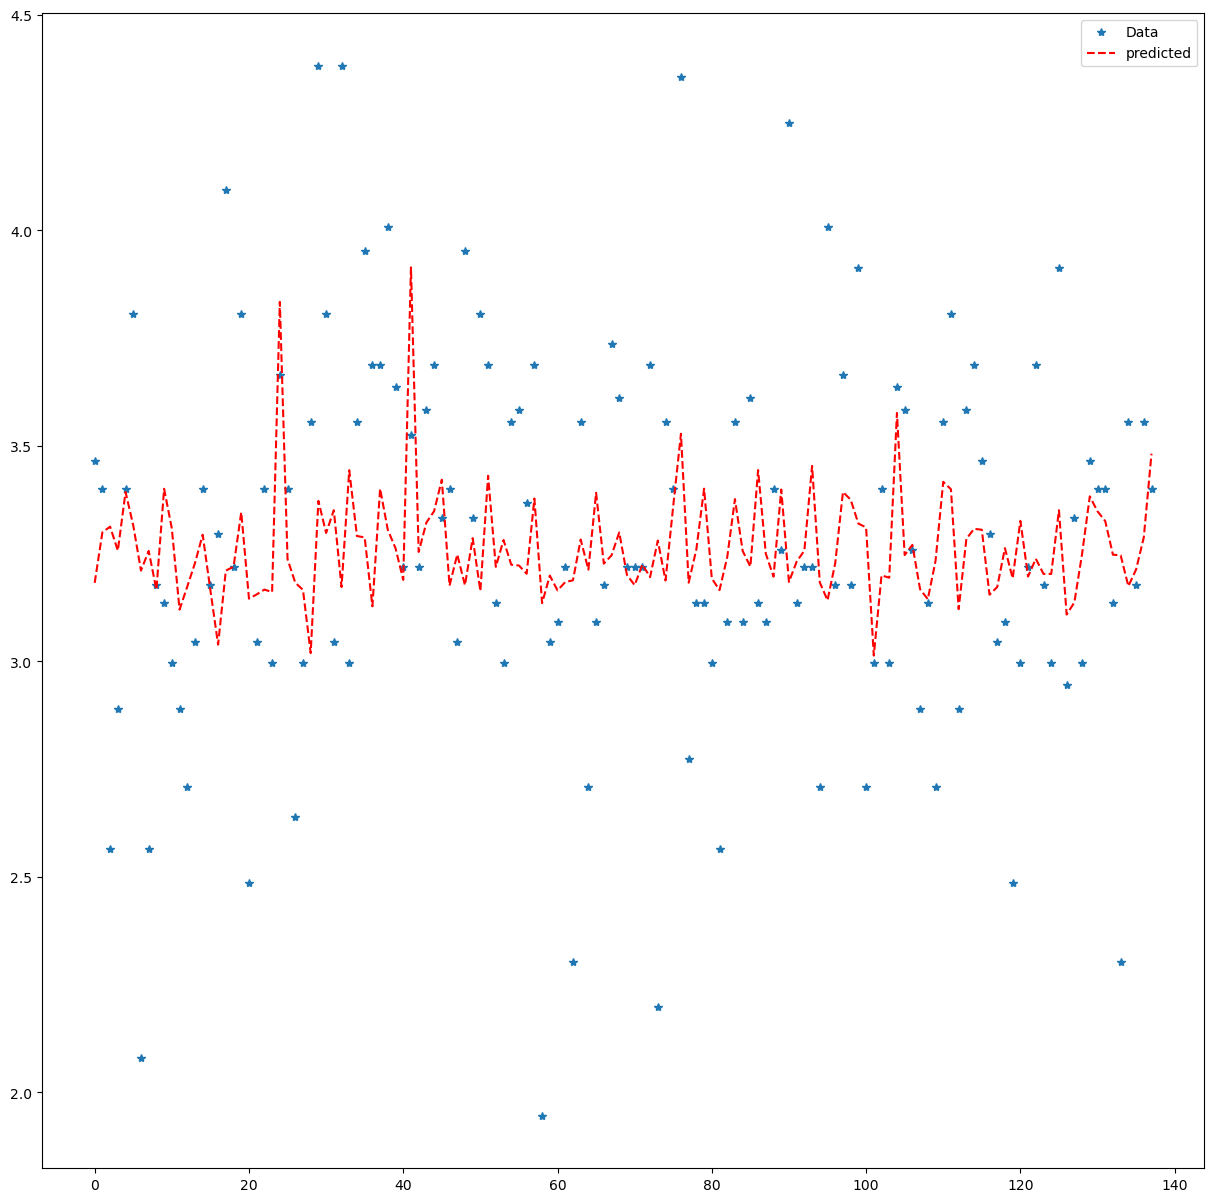

In [112]:
obsno=np.arange(0,138,1)
fig,ax=plt.subplots()
ax.plot(obsno,y_test,'*',label='Data')
ax.plot(obsno,y_pred,'r--',label='predicted')
ax.legend(loc='best')

# Lasso Regression and Ridge Regression

In [113]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.2,random_state=1)

In [114]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,15,10,20,30,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train1,y_train1)

lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train1,y_train1)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-0.20199291325850033


In [115]:
prediction_lasso=lasso_regressor.predict(X_test1)
prediction_ridge=ridge_regressor.predict(X_test1)

# Evaluation Metrics¶

# Lasso Regression

In [116]:
from sklearn import metrics
print('Mean Absolute Error Lasso =',np.exp(metrics.mean_absolute_error(y_test1,prediction_lasso)))
print('Mean Squared Error Lasso =',np.exp(metrics.mean_squared_error(y_test1,prediction_lasso)))
print('Root Mean Squared Error Lasso =',np.exp(np.sqrt(metrics.mean_squared_error(y_test1,prediction_lasso))))

Mean Absolute Error Lasso = 1.3813727042448154
Mean Squared Error Lasso = 1.2002002139960035
Root Mean Squared Error Lasso = 1.532938675391996


# Ridge Regression

In [117]:
from sklearn import metrics
print('Mean Absolute Error Lasso =',np.exp(metrics.mean_absolute_error(y_test1,prediction_ridge)))
print('Mean Squared Error Lasso =',np.exp(metrics.mean_squared_error(y_test1,prediction_ridge)))
print('Root Mean Squared Error Lasso =',np.exp(np.sqrt(metrics.mean_squared_error(y_test1,prediction_ridge))))

Mean Absolute Error Lasso = 1.3809324121813162
Mean Squared Error Lasso = 1.1991438644168746
Root Mean Squared Error Lasso = 1.531357707282761


In [118]:
Lasso_Result = pd.DataFrame({'Actual':np.exp(y_test1),'Predicted':np.exp(prediction_lasso),'Variance':np.exp(y_test1)-np.exp(prediction_lasso)})
Lasso_Result.head()

,Actual,Predicted,Variance
482,32.0,25.227863,6.772137
23,30.0,27.409780,2.590220
189,13.0,27.216024,-14.216024
47,18.0,26.452575,-8.452575
363,30.0,29.456177,0.543823


In [119]:
Ridge_Result = pd.DataFrame({'Actual':np.exp(y_test1),'Predicted':np.exp(prediction_ridge),'Variance':np.exp(y_test1)-np.exp(prediction_ridge)})
Ridge_Result.head()

,Actual,Predicted,Variance
482,32.0,24.736600,7.263400
23,30.0,27.301264,2.698736
189,13.0,27.279862,-14.279862
47,18.0,26.275810,-8.275810
363,30.0,29.637986,0.362014


# Conclusion
1).The age of the patient may be a significant factor in the size of the tumor as in early 20-30 there is lesser size of tumors are observed to that of patients after 30's.

2).At the age 47 there is an high frequence of breast cancer, that is 36.(as per the records).

3).Menopausal status of patients can be an important factor affecting the size of the tumor.As Post-Menopausal has higer risk of having greater Tumor size.

4).between age of 70 to 80 (post-menopausal), the number of positive lymph nodes are high. 

5).Max tumor size is observed in 50's.

6).The survival rate of patients without recurrence after treatment is relatively high as per recurrence after treatment.

7).Patients with smaller tumor sizes have a lower risk of recurrence.

8).Grade 1 tumor is cause of cancer in most of patient.

9 
